# <center> Axe Bank Personal Loan Campaign </center>

### <b> Data Description: </b>
The dataset contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

### <b> Domain: </b>
Banking

### <b> Context: </b> 
This case is about a bank (Axe Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

### Columns Description:

*	ID : Customer ID
*	Age : Customer's age in completed years
*	Experience : #years of professional experience
*	Income : Annual income of the customer (000)
*	ZIPCode : Home Address ZIP code
*	Family : Family size of the customer
*	CCAvg : Avg. spending on credit cards per month (000)
*	Education : Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
*	Mortgage : Value of house mortgage if any. (000)
*	Personal Loan :	Did this customer accept the personal loan offered in the last campaign? 0 - False and 1 - True
*	Securities Account : Does the customer have a securities account with the bank? 0 - False and 1 - True
*	CD Account : Does the customer have a certificate of deposit (CD) account with the bank? 0 - False and 1 - True
*	Online : Does the customer use internet banking facilities? 0 - False and 1 - True
*	CreditCard : Does the customer use a credit card issued by Universal Bank? 0 - False and 1 - True

### Objective: 
The classification goal is to predict the likelihood of a liability customer buying personal loans.

### (1.) Import the datasets and libraries, check datatype, statistical summary,shape,null values or incorrect imputation

In [22]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
## importing libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [24]:
# importing data

df = pd.read_csv("Axe_Bank_Personal_Loan_Data.csv")

In [25]:
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [26]:
df.shape

(5000, 14)

In [27]:
df.dtypes        ## this would give datatype of each column

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [28]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [29]:
#There are negative numbmers in experience! maybe typing error. 
# Convert to non-negative using .abs function

df['Experience'] = df['Experience'].abs()
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.134600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.415189,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [30]:
df.isnull().sum()  #check for null Values

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

### (2) EDA

* Number of unique in each column?
* Number of people with zero mortgage?
* Number of people with zero credit card spending per month?
* Value counts of all categorical columns.
* Univariate and Bivariate
* Get data model ready

In [31]:
df.nunique()
# gives number of unique values in each column

ID                    5000
Age                     45
Experience              44
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [32]:
df.drop(['ID','ZIP Code'],axis=1,inplace=True)

# dropping 'ID' column as it all the unique value and this column wont provide any insight to build a model
# Zip Code represents region and region wise distribution of customers is not helping here
# as alot region are there in just 5000 customers, therefore dropping 'ZIP Code'

<b> Value Counts for Categorical Data

In [33]:
vc = df[['Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard']].sum().reset_index().rename(columns={'index':'Col_Name',0:"Value_Count_1"})
vc['Value_Count_0'] = df.shape[0] - vc['Value_Count_1']
vc

# Value counts of all the category column with two unique values (0,1)

,Col_Name,Value_Count_1,Value_Count_0
0,Personal Loan,480,4520
1,Securities Account,522,4478
2,CD Account,302,4698
3,Online,2984,2016
4,CreditCard,1470,3530


In [34]:
vc['Value_Count_0']=(vc['Value_Count_0']*100)/5000
vc['Value_Count_1']=(vc['Value_Count_1']*100)/5000
vc

,Col_Name,Value_Count_1,Value_Count_0
0,Personal Loan,9.60,90.40
1,Securities Account,10.44,89.56
2,CD Account,6.04,93.96
3,Online,59.68,40.32
4,CreditCard,29.40,70.60


In [35]:
df[df['Mortgage']==0].shape[0]

#count of people having home mortgage as zero, Most of the people donot have mortgage

3462

In [36]:
pd.crosstab(df['Personal Loan'], df['CreditCard'],normalize='columns')

CreditCard,0,1
Personal Loan,,
0,0.904533,0.902721
1,0.095467,0.097279


`When CreditCard value is 0 or 1 in both cases the distribution of target variable is same therefore dropping CreditCard`

In [16]:
df.drop('CreditCard',axis=1,inplace=True)

In [17]:
pd.crosstab(df['Personal Loan'], df['Education'],normalize='columns')

Education,1,2,3
Personal Loan,,,
0,0.95563,0.870278,0.863424
1,0.04437,0.129722,0.136576


In [18]:
pd.crosstab(df['Personal Loan'], df['Family'],normalize='columns')

Family,1,2,3,4
Personal Loan,,,,
0,0.92731,0.91821,0.868317,0.890344
1,0.07269,0.08179,0.131683,0.109656


In [ ]:
pd.barplot(df['Personal Loan'])

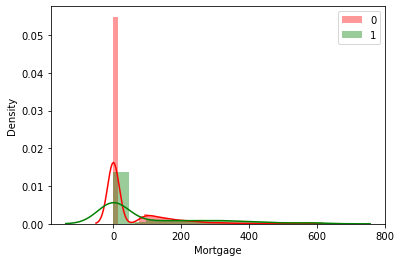

In [19]:
sns.distplot(df[df['Personal Loan']==0]['Mortgage'],color='r',label=0)
sns.distplot(df[df['Personal Loan']==1]['Mortgage'],color='g',label=1)
plt.legend()
plt.show()

# Most people with zero motgage are not taking personal loans

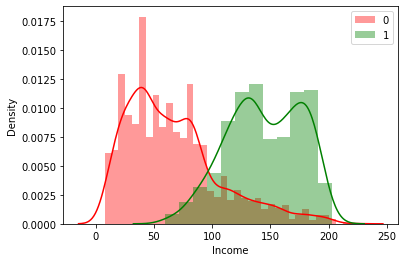

In [20]:
sns.distplot(df[df['Personal Loan']==0]['Income'],color='r',label=0)
sns.distplot(df[df['Personal Loan']==1]['Income'],color='g',label=1)
plt.legend()
plt.show()

In [21]:
# Number of People with high income taking personal loan are high as compared to low income

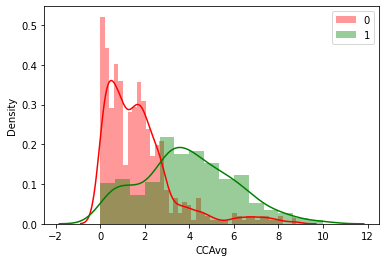

In [21]:
sns.distplot(df[df['Personal Loan']==0]['CCAvg'],color='r',label=0)
sns.distplot(df[df['Personal Loan']==1]['CCAvg'],color='g',label=1)
plt.legend()
plt.show();

In [23]:
# People with high avg credit card spending per month are taking personal loans

In [22]:
df[df['CCAvg']==0].shape[0]

#count of people having zero monthly spending on credit card

106

In [23]:
df['Family'] = df['Family'].astype('category')
df['Education'] = df['Education'].astype('category')

In [24]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online
0,25,1,49,4,1.6,1,0,0,1,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0


### (3) Split the data into training and test set in the ratio of 70:30 respectively

In [25]:
# Separate the independent attributes i.e. every column except personal loan
# Store the target column (Personal Loan) into Y array

X = df.loc[:, df.columns != 'Personal Loan']  # independent variables

y = df.loc[:, df.columns == 'Personal Loan']  # Target variable


In [26]:
X = pd.get_dummies(X,drop_first=True)

In [27]:
y.head()  

,Personal Loan
0,0
1,0
2,0
3,0
4,0


In [28]:
X.head()

,Age,Experience,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,Family_2,Family_3,Family_4,Education_2,Education_3
0,25,1,49,1.6,0,1,0,0,0,0,1,0,0
1,45,19,34,1.5,0,1,0,0,0,1,0,0,0
2,39,15,11,1.0,0,0,0,0,0,0,0,0,0
3,35,9,100,2.7,0,0,0,0,0,0,0,1,0
4,35,8,45,1.0,0,0,0,0,0,0,1,1,0


In [29]:
# Create the training and test data set in the ratio of 70:30 respectively. Can be of any ratio...

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=70)

# Random state seeding for reapeatability of the code
# if random state is not mentioned it would generate different train test sample in every run
# test_size is to select the size of test data

# two variables taken for split therefore output will generate 4 variables: test train for x and test train for y

In [30]:
X_train.shape,X_test.shape

((3500, 13), (1500, 13))

In [31]:
X_train.head()

,Age,Experience,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,Family_2,Family_3,Family_4,Education_2,Education_3
2280,33,7,30,2.0,132,0,0,0,1,0,0,0,1
3944,56,26,62,1.4,0,0,0,1,0,1,0,0,1
1581,53,29,24,0.2,0,0,0,0,1,0,0,0,0
607,28,3,170,0.1,0,0,0,0,0,0,0,0,1
4121,53,27,65,2.8,0,0,0,0,0,0,1,1,0


### (4)  Train multiple models to predict the likelihood of a customer buying personal loans. Print all the metrics related for evaluating the model performance

In [34]:
## importing necessary metrics to evaluate model performance

from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,roc_curve

# Blanks list to store model name, training score, testing score, recall, precision and roc

algo= []
tr = []
te = []
recall = []
precision = []
roc = []

**(a.) Logistic Regression**

In [35]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=7)

model.fit(X_train, y_train)

LogisticRegression(random_state=7)

In [36]:
y_pred_class=model.predict(X_test)
y_pred_prob=model.predict_proba(X_test)

<b> Confusion Matrix

In [37]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

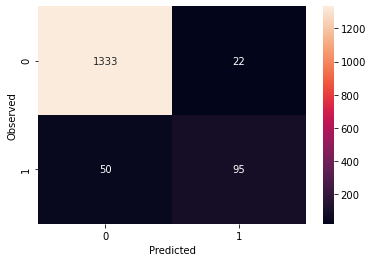

In [38]:
draw_cm(y_test,y_pred_class)

**Confusion matrix means**

* True Positive (observed=1,predicted=1): Predicted Personal loan will be taken and the customer took it

* False Positive (observed=0,predicted=1): Predicted Personal loan will be taken and the customer did not take it

* True Negative (observed=0,predicted=0): Predicted Personal loan will not be taken and the customer did not take it

* False Negative (observed=1,predicted=0): Predicted Personal loan will not be taken and the customer took it

Here more focus towards should be towards recall because our target variable is 'Personal Loan' , i.e whether the customer is accepting the personal loan or not. And the bank wants more people to accept personal loan i.e. less number of False Negative, so that bank doesn't lose real customers who want to take loan. Hence the focus should be on increasing Recall.

After achieving the desired accuracy we can deploy the model for practical use. As in the bank now can predict who will say yes for the personnel loan. They can use the model for upcoming customers.

<b> ROC Curve

In [39]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])

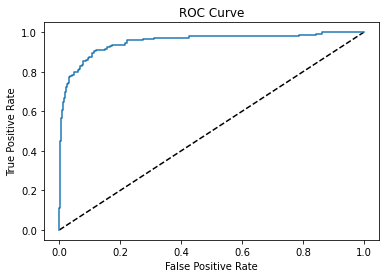

In [40]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [41]:
roc_df=pd.DataFrame([fpr,tpr,thresholds]).T
roc_df.columns=['fpr','tpr','thresholds']
roc_df

,fpr,tpr,thresholds
0,0.000000,0.000000,1.998716
1,0.000000,0.006897,0.998716
2,0.000000,0.110345,0.987579
3,0.000738,0.110345,0.987432
4,0.000738,0.337931,0.916239
...,...,...,...
123,0.843542,0.986207,0.000310
124,0.843542,0.993103,0.000309
125,0.863469,0.993103,0.000258
126,0.863469,1.000000,0.000254


### Gain/Lift Chart

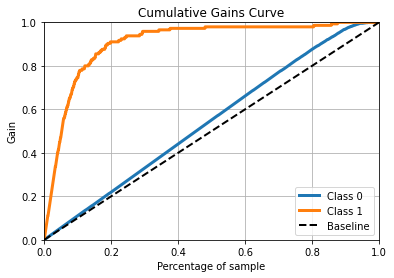

In [42]:
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(y_test, y_pred_prob)
plt.show()

In [43]:
algo.append('Logistic Regression')
tr.append(model.score(X_train, y_train))
te.append(model.score(X_test, y_test))
recall.append(recall_score(y_test,model.predict(X_test)))
precision.append(precision_score(y_test,model.predict(X_test)))
roc.append(roc_auc_score(y_test,model.predict(X_test)))

In [44]:
results = pd.DataFrame()
results['Model'] = algo
results['Training Score'] = tr
results['Testing Score'] = te
results['Recall'] = recall
results['Precision'] = precision
results['ROC AUC Score'] = roc
results = results.set_index('Model')
results

,Training Score,Testing Score,Recall,Precision,ROC AUC Score
Model,,,,,
Logistic Regression,0.958571,0.952,0.655172,0.811966,0.819468


**(b.) Decision Tree**

In [45]:
from sklearn.tree import DecisionTreeClassifier
#instantiating decision tree as the default model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [46]:
algo.append('Decision Tree')
tr.append(dt_model.score(X_train, y_train))
te.append(dt_model.score(X_test, y_test))
recall.append(recall_score(y_test,dt_model.predict(X_test)))
precision.append(precision_score(y_test,dt_model.predict(X_test)))
roc.append(roc_auc_score(y_test,dt_model.predict(X_test)))

In [47]:
results = pd.DataFrame()
results['Model'] = algo
results['Training Score'] = tr
results['Testing Score'] = te
results['Recall'] = recall
results['Precision'] = precision
results['ROC AUC Score'] = roc
results = results.set_index('Model')
results

,Training Score,Testing Score,Recall,Precision,ROC AUC Score
Model,,,,,
Logistic Regression,0.958571,0.952000,0.655172,0.811966,0.819468
Decision Tree,1.000000,0.983333,0.868966,0.954545,0.932269


**(c.) Pruned Decision Tree**

In [48]:
# Decision Tree Classifier using gini, adding the values in the list

model = DecisionTreeClassifier(criterion = "gini", random_state = 7, max_depth=3, min_samples_leaf=5)
model.fit(X_train, y_train)

algo.append('Pruned Decision Tree')
tr.append(model.score(X_train, y_train))
te.append(model.score(X_test, y_test))
recall.append(recall_score(y_test,model.predict(X_test)))
precision.append(precision_score(y_test,model.predict(X_test)))
roc.append(roc_auc_score(y_test,model.predict(X_test)))

In [49]:
results = pd.DataFrame()
results['Model'] = algo
results['Training Score'] = tr
results['Testing Score'] = te
results['Recall'] = recall
results['Precision'] = precision
results['ROC AUC Score'] = roc
results = results.set_index('Model')
results

,Training Score,Testing Score,Recall,Precision,ROC AUC Score
Model,,,,,
Logistic Regression,0.958571,0.952000,0.655172,0.811966,0.819468
Decision Tree,1.000000,0.983333,0.868966,0.954545,0.932269
Pruned Decision Tree,0.967714,0.972667,0.731034,0.981481,0.864779


**(d.) Random Forest**

In [50]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=7, n_estimators=50)

model.fit(X_train, y_train)

algo.append('Random Forest')
tr.append(model.score(X_train, y_train))
te.append(model.score(X_test, y_test))
recall.append(recall_score(y_test,model.predict(X_test)))
precision.append(precision_score(y_test,model.predict(X_test)))
roc.append(roc_auc_score(y_test,model.predict(X_test)))

In [51]:
results = pd.DataFrame()
results['Model'] = algo
results['Training Score'] = tr
results['Testing Score'] = te
results['Recall'] = recall
results['Precision'] = precision
results['ROC AUC Score'] = roc
results = results.set_index('Model')
results

,Training Score,Testing Score,Recall,Precision,ROC AUC Score
Model,,,,,
Logistic Regression,0.958571,0.952000,0.655172,0.811966,0.819468
Decision Tree,1.000000,0.983333,0.868966,0.954545,0.932269
Pruned Decision Tree,0.967714,0.972667,0.731034,0.981481,0.864779
Random Forest,1.000000,0.988667,0.882759,1.000000,0.941379


**(e.) Gradient Boosting**

In [52]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(random_state=7, n_estimators=200,)

model.fit(X_train, y_train)

algo.append('Gradient Boosting')
tr.append(model.score(X_train, y_train))
te.append(model.score(X_test, y_test))
recall.append(recall_score(y_test,model.predict(X_test)))
precision.append(precision_score(y_test,model.predict(X_test)))
roc.append(roc_auc_score(y_test,model.predict(X_test)))

In [53]:
# DataFrame to compare results.

results = pd.DataFrame()
results['Model'] = algo
results['Training Score'] = tr
results['Testing Score'] = te
results['Recall'] = recall
results['Precision'] = precision
results['ROC AUC Score'] = roc
results = results.set_index('Model')
results

,Training Score,Testing Score,Recall,Precision,ROC AUC Score
Model,,,,,
Logistic Regression,0.958571,0.952000,0.655172,0.811966,0.819468
Decision Tree,1.000000,0.983333,0.868966,0.954545,0.932269
Pruned Decision Tree,0.967714,0.972667,0.731034,0.981481,0.864779
Random Forest,1.000000,0.988667,0.882759,1.000000,0.941379
Gradient Boosting,0.999143,0.988667,0.896552,0.984848,0.947538


### Give Business understanding of your model?

### Classification Report (Bonus - 1)

In [54]:
# !pip install yellowbrick

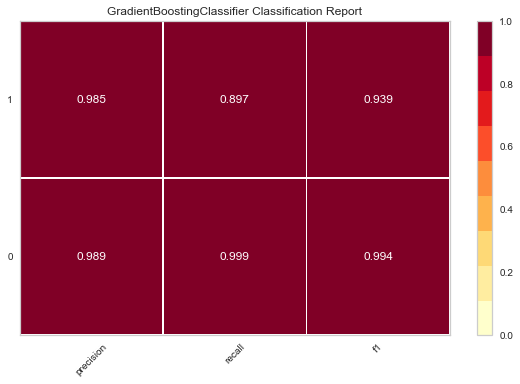

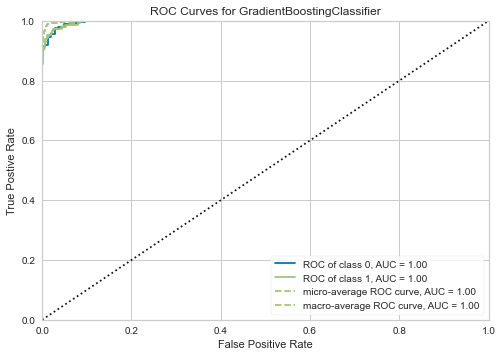

In [55]:
from yellowbrick.classifier import ClassificationReport, ROCAUC
# Visualize model performance with yellowbrick library
viz = ClassificationReport(model)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

roc = ROCAUC(model)
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show();

### Reference Links & Addtional Material :

* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

<b>Please refer above link for the details of parameters</b>

* https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/

* https://www.analyticsvidhya.com/blog/2016/01/ridge-lasso-regression-python-complete-tutorial/

<b>Model Evaluation & Validation </b>

* https://www.analyticsvidhya.com/blog/2019/08/11-important-model-evaluation-error-metrics/
* https://medium.com/analytics-vidhya/a-simple-introduction-to-validating-and-testing-a-model-part-1-2a0765deb198

<b> Blogs on Same Data - </b>
* https://medium.com/@rohanaggarwal45/thera-bank-case-with-univariate-as-well-as-bivariate-analysis-all-the-machine-learning-models-7f61d04eaa2a

* https://www.kaggle.com/pritech/bank-personal-loan-modelling

### AutoML by H2o (Bonus - 2)
* installation steps - http://docs.h2o.ai/h2o/latest-stable/h2o-docs/downloading.html

In [56]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM (build 11.0.6+8-b765.1, mixed mode)
  Starting server from C:\Users\Rahul Aggarwal\Documents\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\RAHULA~1\AppData\Local\Temp\tmpnug873pb
  JVM stdout: C:\Users\RAHULA~1\AppData\Local\Temp\tmpnug873pb\h2o_Rahul_Aggarwal_started_from_python.out
  JVM stderr: C:\Users\RAHULA~1\AppData\Local\Temp\tmpnug873pb\h2o_Rahul_Aggarwal_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.1.3
H2O_cluster_version_age:,1 month and 11 days
H2O_cluster_name:,H2O_from_python_Rahul_Aggarwal_8co8ir
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.957 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"accepting new members, healthy"


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   Family              5000 non-null   category
 4   CCAvg               5000 non-null   float64 
 5   Education           5000 non-null   category
 6   Mortgage            5000 non-null   int64   
 7   Personal Loan       5000 non-null   int64   
 8   Securities Account  5000 non-null   int64   
 9   CD Account          5000 non-null   int64   
 10  Online              5000 non-null   int64   
dtypes: category(2), float64(1), int64(8)
memory usage: 361.7 KB


In [69]:
df['Personal Loan'] = df['Personal Loan'].astype('category')

In [100]:
h2o_df=h2o.H2OFrame(df)
h2o_df.head()

Parse progress: |█████████████████████████████████████████████████████████| 100%


Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online
25,1,49,4,1.6,1,0,0,1,0,0
45,19,34,3,1.5,1,0,0,1,0,0
39,15,11,1,1,1,0,0,0,0,0
35,9,100,1,2.7,2,0,0,0,0,0
35,8,45,4,1,2,0,0,0,0,0
37,13,29,4,0.4,2,155,0,0,0,1
53,27,72,2,1.5,2,0,0,0,0,1
50,24,22,1,0.3,3,0,0,0,0,0
35,10,81,3,0.6,2,104,0,0,0,1
34,9,180,1,8.9,3,0,1,0,0,0


In [101]:
h2o_df['Personal Loan']=h2o_df['Personal Loan'].asfactor()

In [58]:
### AutoML - https://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html
##### A Deep dive into H2O’s AutoML - https://towardsdatascience.com/a-deep-dive-into-h2os-automl-4b1fe51d3f3e

In [106]:
splits = h2o_df.split_frame(ratios=[0.8],seed=1)
train = splits[0]
test = splits[1]

In [107]:
y = "Personal Loan" 
x = h20_df.columns 
x.remove(y) 

In [61]:
from h2o.automl import H2OAutoML

In [97]:
?H2OAutoML

In [108]:
aml = H2OAutoML(max_runtime_secs=120, seed=1,stopping_metric='logloss')

In [109]:
aml.train(x=x,y=y, training_frame=train)

AutoML progress: |
12:06:16.741: AutoML: XGBoost is not available; skipping it.

████████████████████████████████████████████████████████| 100%


In [110]:
lb = aml.leaderboard
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_1_AutoML_20201109_120616,0.998386,0.0350685,0.986969,0.0473175,0.0995904,0.00991826
GBM_grid__1_AutoML_20201109_120616_model_10,0.998143,0.0327945,0.985244,0.0436066,0.0989926,0.00979954
GBM_grid__1_AutoML_20201109_120616_model_8,0.998012,0.033384,0.984458,0.0469041,0.0990206,0.00980508
GBM_2_AutoML_20201109_120616,0.998004,0.0329696,0.986025,0.0402671,0.0933084,0.00870645
GBM_4_AutoML_20201109_120616,0.997901,0.0367375,0.984944,0.0514419,0.0979678,0.00959769
GBM_3_AutoML_20201109_120616,0.997856,0.0359039,0.984313,0.0528519,0.0983598,0.00967465
GBM_grid__1_AutoML_20201109_120616_model_7,0.997673,0.0348908,0.982773,0.0507209,0.0992367,0.00984793
GBM_grid__1_AutoML_20201109_120616_model_6,0.997575,0.0397711,0.982778,0.0397898,0.102762,0.0105601
GBM_grid__1_AutoML_20201109_120616_model_2,0.997514,0.0402119,0.983679,0.0495864,0.101945,0.0103928
GBM_grid__1_AutoML_20201109_120616_model_5,0.997423,0.0364834,0.981749,0.0473175,0.0992494,0.00985044


In [111]:
# Get model ids for all models in the AutoML Leaderboard
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
# Get the "All Models" Stacked Ensemble model
se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
# Get the Stacked Ensemble metalearner model
metalearner = h2o.get_model(se.metalearner()['name'])

In [112]:
pred = aml.predict(test)
pred.head()

gbm prediction progress: |████████████████████████████████████████████████| 100%


predict,p0,p1
0,0.999805,0.00019531
1,0.00520787,0.994792
0,0.999788,0.000212225
0,0.999773,0.000227354
0,0.999657,0.000343304
0,0.998897,0.0011031
0,0.99935,0.000650009
0,0.999788,0.000212431
0,0.932824,0.0671756
0,0.997519,0.00248144


In [66]:
# h2o.save_model(aml.leader, path="./model_bin")

'C:\\Users\\Rahul Aggarwal\\Desktop\\Data Science Trainings\\RSB\\DSC Instructor Material\\Data Science Masters\\model_bin\\StackedEnsemble_BestOfFamily_AutoML_20201109_114442'